In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [3]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

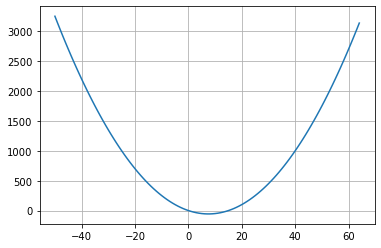

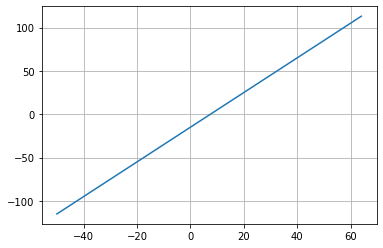

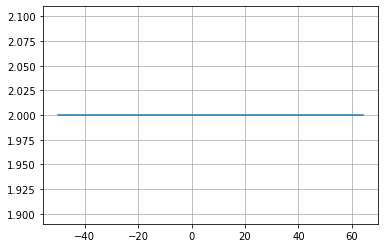

In [6]:
x = np.arange(-50,65)
plt.plot(x,f(x))
plt.grid()
plt.show()
plt.plot(x,Df(x))
plt.grid()
plt.show()
plt.plot(x, [DDf(x)]*len(x))
plt.grid()
plt.show()

In [9]:
def Gradient(epsilon, learning_rate, Df, initial_value):
    x = initial_value
    gradient = Df(x)
    i = 0
    while gradient > epsilon:
        x = x - learning_rate*gradient
        gradient = Df(x)
        i+=1
    print(f'GD Results with x0 = {initial_value}, lr = {learning_rate}, epsilon = {epsilon}.')
    print(f'Found solution after {i} iterations.')
    print(f'x_min = {x}')
    print(f'Gradient = {gradient}')
    return x, gradient

In [10]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1
X_min, gradient = Gradient(0.1, 0.01, Df, 40)

GD Results with x0 = 40, lr = 0.01, epsilon = 0.1.
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [11]:
def Newton(epsilon, learning_rate, Df, DDf, initial_value):
    x = initial_value
    gradient = Df(x)
    i = 0
    while gradient > epsilon:
        x = x - learning_rate*(Df(x)/DDf(x))
        gradient = Df(x)
        i+=1
    print(f'Newton Results with x0 = {initial_value}, epsilon = {epsilon}')
    print(f'Found solution after {i} iterations.')
    print(f'x_min = {x}')
    print(f'Gradient = {gradient}')
    return x, gradient

In [13]:
# Newton's method without learning rate, x0=40, epsilon = 0.1
X_min, gradient = Newton(0.1, 1, Df, DDf, 40)

Newton Results with x0 = 40, epsilon = 0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [14]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1
X_min, gradient = Newton(0.1, 0.8, Df, DDf, 40)

Newton Results with x0 = 40, epsilon = 0.1
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [15]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

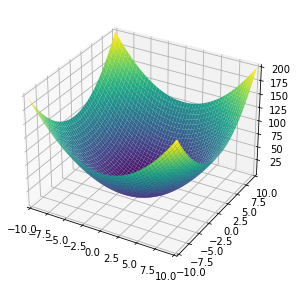

In [20]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(15,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

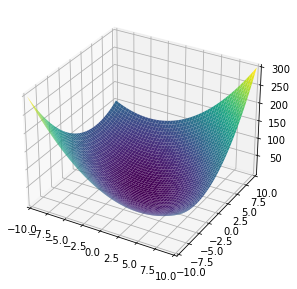

In [21]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

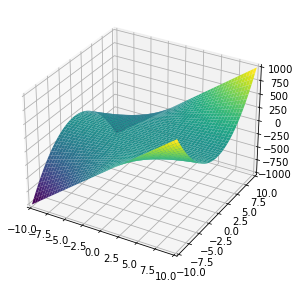

In [22]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [40]:
def MVGradient(epsilon, learning_rate, Df, initial_value):
    x = initial_value
    gradient_vector = Df(x)
    gradient_norm = np.linalg.norm(gradient_vector,2)
    i = 0
    while gradient_norm > epsilon:
        x = x - learning_rate*Df(x)
        gradient_vector = Df(x)
        gradient_norm = np.linalg.norm(gradient_vector,2)
        i+=1
    print(f'Found solution after {i} iterations.')
    print(f'xy_min = {x}')
    print(f'Gradient = {gradient_vector}')
    return x, gradient_vector

In [41]:
def MVNewton(epsilon, learning_rate, Df, DDf, initial_value):
    x = initial_value
    gradient_vector = Df(x)
    gradient_norm = np.linalg.norm(gradient_vector)
    i = 0
    while gradient_norm > epsilon:
        H_inverse = np.linalg.inv(DDf(x))
        x = x - learning_rate*(H_inverse@Df(x))
        gradient_vector = Df(x)
        gradient_norm = np.linalg.norm(gradient_vector,2)
        i+=1
    print(f'Found solution after {i} iterations.')
    print(f'xy_min = {x}')
    print(f'Gradient = {gradient_vector}')
    return x, gradient_vector

In [26]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [27]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [42]:
x_min,Gradient = MVGradient(0.001, 0.01, Df_1, np.array([10,10]))

Found solution after 508 iterations.
xy_min = [0.00034902 0.00034902]
Gradient = [0.00069803 0.00069803]


In [43]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVGradient(0.001, 0.01, Df_1, np.array([10,10]))

Found solution after 508 iterations.
xy_min = [0.00034902 0.00034902]
Gradient = [0.00069803 0.00069803]


In [44]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVGradient(0.001, 0.5, Df_1, np.array([10,10]))

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [46]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVNewton(0.001, 1, Df_1, DDf_1, np.array([10,10]))

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [47]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVNewton(0.001, 0.5, Df_1, DDf_1, np.array([10,10]))

Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [48]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVGradient(0.001, 0.5, Df_2, np.array([10,10]))

Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [49]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVNewton(0.001, 1, Df_2, DDf_2, np.array([10,10]))

Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [50]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVNewton(0.001, 0.9, Df_2, DDf_2, np.array([10,10]))

Found solution after 5 iterations.
xy_min = [1.e-04 1.e-04]
Gradient = [0.0003 0.0003]


In [51]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [52]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVGradient(0.001, 0.01, Df_5, np.array([10,10]))

Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [53]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001
x_min,Gradient = MVNewton(0.001, 1, Df_5, DDf_5, np.array([10,10]))

Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [63]:
def BFGS(epsilon, alpha, Df, DDf, initial_value, before_initial):
    X_minus = before_initial
    X = initial_value
    gradient_norm = np.linalg.norm(Df(X))
    I = np.diag(np.ones(len(X)))
    B_inverse = I
    i = 0
    print(f'xn-1:\n {X_minus} \n')
    print(f'xn:\n {X} \n')
    print(f'xn-1:\n {Df(X_minus)} \n')
    print(f'Dfxn:\n {Df(X)} \n')
    print(f'{gradient_norm}')
    print('*****')
    print(f'B_inv:\n{B_inverse}')
    print('****************')
    while gradient_norm > epsilon:
        
        dx = X - X_minus
        y = Df(X) - Df(X_minus)
        
        #Fraction terms in B inverse equation:
        t_1 = (dx@y.T)/(y.T@dx)
        t_2 = (y@dx.T)/(y.T@dx)
        t_3 = (dx@dx.T)/(y.T@dx)
        
        #B inverse update:
        B_inverse = (I-(t_1))@(B_inverse)@(I-(t_2)) + (t_3)
        
        #X update:
        X_minus = X
        X = X - alpha*B_inverse@Df(X)
        gradient_norm = np.linalg.norm(Df(X))
        
        print(f'xn_1:\n {X_minus} \n')
        print(f'xn:\n {X} \n')        
        print(f'Dfxn_1:\n {Df(X_minus)} \n')
        print(f'Dfxn:\n {Df(X)} \n')
        print(f'{gradient_norm}')
        print('*****')
        print(f'B_inv:\n{B_inverse}')
        print('****************')
        i+=1
        
    print(f'\n\nFound solution after {i} iterations.')
    print(f'xy_min = {X}\n')
    print(f'Gradient = {Df(X)}\n')

In [64]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
BFGS(0.001, 1, Df_1, DDf_1, np.array([[9],[9]]), np.array([[10],[10]]))

xn-1:
 [[10]
 [10]] 

xn:
 [[9]
 [9]] 

xn-1:
 [[20]
 [20]] 

Dfxn:
 [[18]
 [18]] 

25.45584412271571
*****
B_inv:
[[1. 0.]
 [0. 1.]]
****************
xn_1:
 [[9]
 [9]] 

xn:
 [[0.]
 [0.]] 

Dfxn_1:
 [[18]
 [18]] 

Dfxn:
 [[0.]
 [0.]] 

0.0
*****
B_inv:
[[ 0.75 -0.25]
 [-0.25  0.75]]
****************


Found solution after 1 iterations.
xy_min = [[0.]
 [0.]]

Gradient = [[0.]
 [0.]]



In [65]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9
BFGS(0.001, 0.9, Df_1, DDf_1, np.array([[9],[9]]), np.array([[10],[10]]))

xn-1:
 [[10]
 [10]] 

xn:
 [[9]
 [9]] 

xn-1:
 [[20]
 [20]] 

Dfxn:
 [[18]
 [18]] 

25.45584412271571
*****
B_inv:
[[1. 0.]
 [0. 1.]]
****************
xn_1:
 [[9]
 [9]] 

xn:
 [[0.9]
 [0.9]] 

Dfxn_1:
 [[18]
 [18]] 

Dfxn:
 [[1.8]
 [1.8]] 

2.545584412271567
*****
B_inv:
[[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]] 

xn:
 [[0.09]
 [0.09]] 

Dfxn_1:
 [[1.8]
 [1.8]] 

Dfxn:
 [[0.18]
 [0.18]] 

0.2545584412271567
*****
B_inv:
[[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]] 

xn:
 [[0.009]
 [0.009]] 

Dfxn_1:
 [[0.18]
 [0.18]] 

Dfxn:
 [[0.018]
 [0.018]] 

0.025455844122715655
*****
B_inv:
[[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]] 

xn:
 [[0.0009]
 [0.0009]] 

Dfxn_1:
 [[0.018]
 [0.018]] 

Dfxn:
 [[0.0018]
 [0.0018]] 

0.0025455844122715655
*****
B_inv:
[[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]] 

xn:
 [[9.e-05]
 [9.e-05]] 

Dfxn_1:
 [[0.0018]
 [0.0018]] 

Dfxn:
 [[0.00018]
 [0

In [66]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
BFGS(0.001, 1, Df_2, DDf_2, np.array([[9],[9]]), np.array([[10],[10]]))

xn-1:
 [[10]
 [10]] 

xn:
 [[9]
 [9]] 

xn-1:
 [[30]
 [30]] 

Dfxn:
 [[27]
 [27]] 

38.18376618407357
*****
B_inv:
[[1. 0.]
 [0. 1.]]
****************
xn_1:
 [[9]
 [9]] 

xn:
 [[1.77635684e-15]
 [1.77635684e-15]] 

Dfxn_1:
 [[27]
 [27]] 

Dfxn:
 [[5.32907052e-15]
 [5.32907052e-15]] 

7.53644380168212e-15
*****
B_inv:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************


Found solution after 1 iterations.
xy_min = [[1.77635684e-15]
 [1.77635684e-15]]

Gradient = [[5.32907052e-15]
 [5.32907052e-15]]



In [67]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9
BFGS(0.001, 0.9, Df_2, DDf_2, np.array([[9],[9]]), np.array([[10],[10]]))

xn-1:
 [[10]
 [10]] 

xn:
 [[9]
 [9]] 

xn-1:
 [[30]
 [30]] 

Dfxn:
 [[27]
 [27]] 

38.18376618407357
*****
B_inv:
[[1. 0.]
 [0. 1.]]
****************
xn_1:
 [[9]
 [9]] 

xn:
 [[0.9]
 [0.9]] 

Dfxn_1:
 [[27]
 [27]] 

Dfxn:
 [[2.7]
 [2.7]] 

3.8183766184073655
*****
B_inv:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]] 

xn:
 [[0.09]
 [0.09]] 

Dfxn_1:
 [[2.7]
 [2.7]] 

Dfxn:
 [[0.27]
 [0.27]] 

0.38183766184073553
*****
B_inv:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]] 

xn:
 [[0.009]
 [0.009]] 

Dfxn_1:
 [[0.27]
 [0.27]] 

Dfxn:
 [[0.027]
 [0.027]] 

0.038183766184073605
*****
B_inv:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]] 

xn:
 [[0.0009]
 [0.0009]] 

Dfxn_1:
 [[0.027]
 [0.027]] 

Dfxn:
 [[0.0027]
 [0.0027]] 

0.0038183766184073705
*****
B_inv:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.00

In [68]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001
BFGS(0.001, 1, Df_5, DDf_5, np.array([[9],[9]]), np.array([[10],[10]]))

xn-1:
 [[10]
 [10]] 

xn:
 [[9]
 [9]] 

xn-1:
 [[200]
 [100]] 

Dfxn:
 [[162]
 [ 81]] 

181.12150617748296
*****
B_inv:
[[1. 0.]
 [0. 1.]]
****************
xn_1:
 [[9]
 [9]] 

xn:
 [[4.73684211]
 [4.73684211]] 

Dfxn_1:
 [[162]
 [ 81]] 

Dfxn:
 [[44.87534626]
 [22.43767313]] 

50.172162376034116
*****
B_inv:
[[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]] 

xn:
 [[3.10344828]
 [3.10344828]] 

Dfxn_1:
 [[44.87534626]
 [22.43767313]] 

Dfxn:
 [[19.2627824]
 [ 9.6313912]] 

21.53644544322043
*****
B_inv:
[[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]] 

xn:
 [[1.875]
 [1.875]] 

Dfxn_1:
 [[19.2627824]
 [ 9.6313912]] 

Dfxn:
 [[7.03125 ]
 [3.515625]] 

7.861176483398071
*****
B_inv:
[[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[1.875]
 [1.875]] 

xn:
 [[1.16883117]
 [1.16883117]] 

Dfxn_1:
 [[7.03125 ]
 [3.515625]] 

Dfxn:
 [[2.7323326]
